## olympic games dataset

In [1]:
import pandas as pd

file_path = 'data/athlete_events.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
import duckdb as db
from duckdb import query

result_df = query("SELECT * FROM df").df()
result_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [5]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
query = """SELECT Name, Age, Sport FROM df WHERE Age IS NOT NULL ORDER BY Age DESC LIMIT 10"""
oldest_athletes = db.query(query).df()
oldest_athletes

,Name,Age,Sport
0,John Quincy Adams Ward,97.0,Art Competitions
1,Winslow Homer,96.0,Art Competitions
2,Thomas Cowperthwait Eakins,88.0,Art Competitions
3,Thomas Cowperthwait Eakins,88.0,Art Competitions
4,Thomas Cowperthwait Eakins,88.0,Art Competitions
5,George Denholm Armour,84.0,Art Competitions
6,Louis Tauzin,81.0,Art Competitions
7,Robert Tait McKenzie,81.0,Art Competitions
8,Max Liebermann,80.0,Art Competitions
9,Max Liebermann,80.0,Art Competitions


In [10]:
query = """SELECT Name, Age, Sport FROM df WHERE Age IS NOT NULL ORDER BY Age ASC LIMIT 10"""
youngest_athletes = db.query(query).df()
youngest_athletes

,Name,Age,Sport
0,Dimitrios Loundras,10.0,Gymnastics
1,Megan Olwen Devenish Taylor (-Mandeville-Ellis),11.0,Figure Skating
2,Liana Vicens,11.0,Swimming
3,Liana Vicens,11.0,Swimming
4,Liana Vicens,11.0,Swimming
5,Liana Vicens,11.0,Swimming
6,Magdalena Cecilia Colledge,11.0,Figure Skating
7,Carlos Bienvenido Front Barrera,11.0,Rowing
8,Luigina Giavotti,11.0,Gymnastics
9,"Sonja Henie (-Topping, -Gardiner, -Onstad)",11.0,Figure Skating


In [11]:
query = """ SELECT Sport, MEDIAN(Age) as MedianAge FROM df WHERE Age IS NOT NULL GROUP BY Sport ORDER BY MedianAge DESC LIMIT 5"""

highest_median_age = db.query(query).df()
highest_median_age

,Sport,MedianAge
0,Roque,59.0
1,Art Competitions,45.0
2,Alpinism,38.0
3,Polo,35.0
4,Croquet,33.0


In [12]:
query = """ SELECT Sport, MEDIAN(Age) as MedianAge FROM df WHERE Age IS NOT NULL GROUP BY Sport ORDER BY MedianAge ASC LIMIT 5"""

lowest_median_age = db.query(query).df()
lowest_median_age

,Sport,MedianAge
0,Rhythmic Gymnastics,18.0
1,Swimming,20.0
2,Figure Skating,22.0
3,Synchronized Swimming,22.0
4,Diving,22.0


In [15]:
query = """SELECT NOC, COUNT(*) as GoldMedals FROM df WHERE Medal = 'Gold' GROUP BY NOC ORDER BY GoldMedals DESC LIMIT 10"""

top10_gold_countries = db.query(query).df()
top10_gold_countries


,NOC,GoldMedals
0,USA,2638
1,URS,1082
2,GER,745
3,GBR,678
4,ITA,575
5,FRA,501
6,SWE,479
7,CAN,463
8,HUN,432
9,GDR,397


In [17]:
query = """SELECT NOC, COUNT(*) as TotalMedals FROM df WHERE Medal IS NOT NULL GROUP BY NOC ORDER BY TotalMEdals DESC LIMIT 10"""

top10_medal_countries = db.query(query).df()
top10_medal_countries

,NOC,TotalMedals
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777
5,ITA,1637
6,SWE,1536
7,CAN,1352
8,AUS,1320
9,RUS,1165


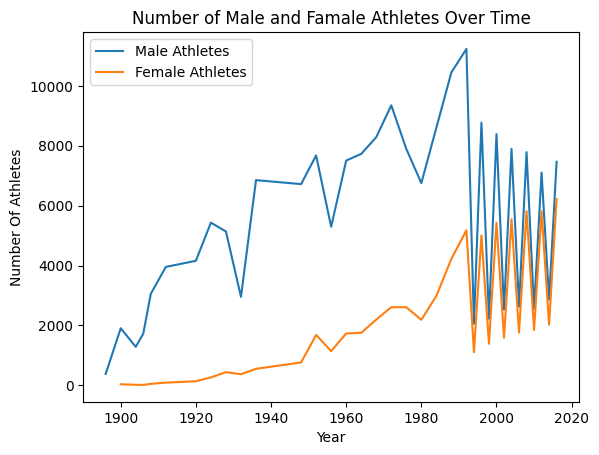

In [18]:
import matplotlib.pyplot as plt

query = """SELECT Year, Sex, COUNT(*) as Athletes FROM df GROUP BY Year, Sex ORDER BY Year"""

gender_counts = db.query(query).df()

male_athletes = gender_counts[gender_counts['Sex'] == 'M']
female_athletes = gender_counts[gender_counts['Sex'] == 'F']

plt.plot(male_athletes['Year'], male_athletes['Athletes'], label = 'Male Athletes')
plt.plot(female_athletes['Year'], female_athletes['Athletes'], label = 'Female Athletes')

plt.title('Number of Male and Famale Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number Of Athletes')
plt.legend()
plt.show()

In [19]:
df.describe

<bound method NDFrame.describe of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Sum

In [25]:
# Räkna antalet medaljer per land
medals_per_country = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
medals_per_country.head(10)


NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64

In [24]:
gender_distribution = df['Sex'].value_counts()
gender_distribution


Sex
M    196594
F     74522
Name: count, dtype: int64

In [23]:
popular_sports = df['Sport'].value_counts().head(10)
popular_sports


Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64

In [26]:
average_age_sport = df.groupby('Sport')['Age'].mean().sort_values(ascending=False)
average_age_sport.head(10)


Sport
Roque               53.333333
Art Competitions    45.901009
Alpinism            38.812500
Polo                35.333333
Equestrianism       34.390831
Croquet             33.733333
Shooting            33.422226
Motorboating        33.333333
Jeu De Paume        32.454545
Curling             31.412527
Name: Age, dtype: float64

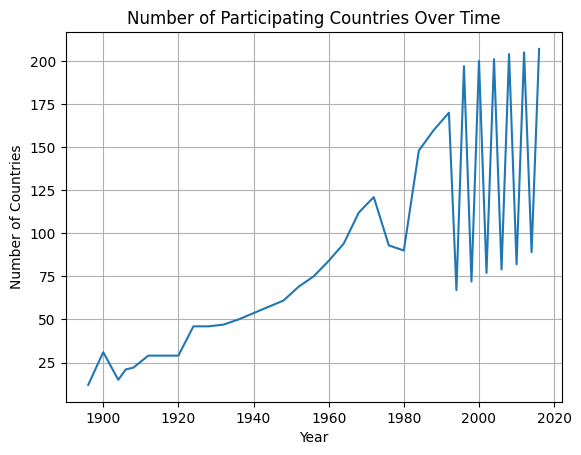

In [27]:
countries_per_year = df.groupby('Year')['NOC'].nunique()
countries_per_year.plot(kind='line', title='Number of Participating Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()


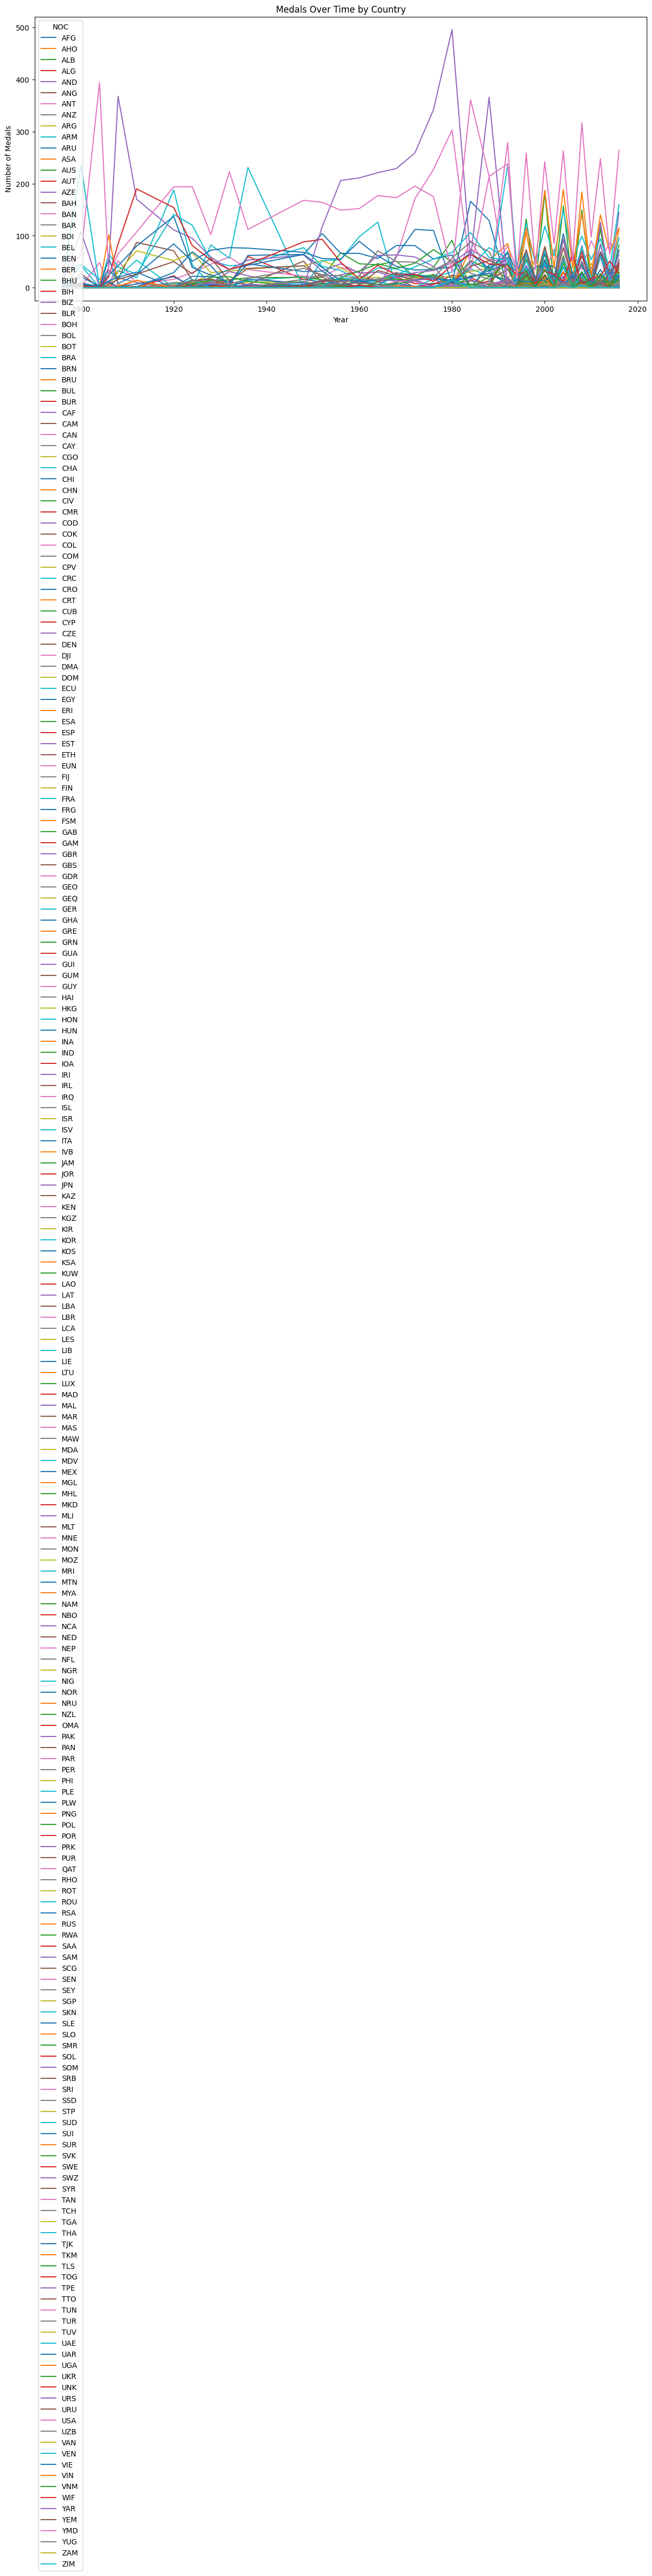

In [28]:
medals_by_year_country = df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)
medals_by_year_country.plot(kind='line', figsize=(15, 7), title='Medals Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()
